# AI Agents - Chapter 2

## Connecting to ChatGPt

In [1]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load API key from .env file
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')
# Ensure the API key is available
if not api_key:
    raise ValueError("No API key found. Please check your .env file.")
client = OpenAI(api_key=api_key) # creates a client with the key


# Example function to query ChatGPT
# Creates a chat completion
def ask_chatgpt(user_message):
    response = client.chat.completions.create(
        model="gpt-4.1",  # gpt-4 turbo or a model of your preference
        messages=[{"role": "system", "content": "You are a helpful assistant."},
                  {"role": "user", "content": user_message}],
        temperature=0.7,
        )       
    return response.choices[0].message.content # Returns the content of the response


# Example usage
user = "What is the capital of Switerland?"
response = ask_chatgpt(user)
print(response)


The capital of Switzerland is **Bern**.


## Running and connecting to an llm locally using LM Studio

In [2]:
# Connecting to a local model using LM Studio
from openai import OpenAI 
client = OpenAI(base_url="http://localhost:1234/v1", api_key="not-needed") 
completion = client.chat.completions.create(model="local-model",
                                            messages=[
                                                {"role": "system", "content": "Always answer in rhymes."},
                                                {"role": "user", "content": "What is the weather like today in Washington IL"}
                                                ],
                                            temperature=0.7,
                                            ) 

print(completion.choices[0].message)

APIConnectionError: Connection error.

## 2.3 Prompt Engineering

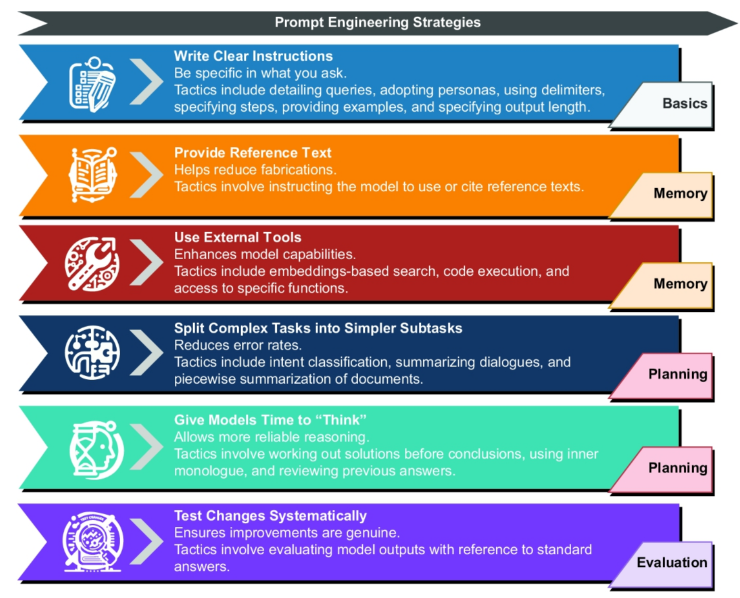

- Write Clear Instructions: Be clean and specific in what you ask for
- Create detailed queries
- Adopt a persona
- GPT rubber ducking (Explain it like the GPT is a rubber duckyj)
- Using delimiters: This helps focus the gpt on certain things
- Specifiying steps: This gives the GPT certain instructions to follow
- Providing examples
- Specify the output length



In [ ]:
# Various utility functions for prompt engineering
import os
import json
from prompt_utils import prompt_llm


def list_text_files_in_directory(directory):
    text_files = []
    for filename in os.listdir(directory):
        if filename.startswith('_'):
            continue
        if filename.endswith(".jsonl"):
            text_files.append(filename)
    return text_files

       
def load_and_parse_json_file(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        json_text = ""
        for line in file:
            line = line.strip()
            json_text += line
            if line == "]":
                try:
                    json_data = json.loads(json_text)
                    data.append(json_data)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON: {json_text}")
                    print(e)
                json_text = ""    
    return data


def main():
    directory = "prompts"  # You can change this to the directory containing your text files
    text_files = list_text_files_in_directory(directory)

    if not text_files:
        print("No text files found in the directory.")
        return
    
    def print_available():
        print("Available prompt tactics:")
        for i, filename in enumerate(text_files, start=1):
            print(f"{i}. {filename}")

    while True:
        try:
            print_available()
            choice = int(input("Enter the number of the prompt tactic to run (or 0 to exit): "))
            if choice == 0:
                break
            elif 1 <= choice <= len(text_files):
                selected_file = text_files[choice - 1]
                file_path = os.path.join(directory, selected_file)
                prompts = load_and_parse_json_file(file_path)
                print(f"Running prompts for {selected_file}")                
                for i, prompt in enumerate(prompts):
                    print(f"PROMPT {i+1} -------------------------------------------------")
                    print(prompt)
                    print(f"REPLY -------------------------------------------------")
                    #using OpenAI
                    print(prompt_llm(prompt))
                    #using local LLM
                    # print(prompt_llm(prompt, 
                    #                  model="local-model", 
                    #                  base_url="http://localhost:1234/v1",
                    #                  api_key="not used"))
            else:
                print("Invalid choice. Please enter a valid number.")
        except ValueError:
            print("Invalid input. Please enter a number.")

if __name__ == "__main__":
    main()


Available prompt tactics:
1. provide_examples.jsonl
2. detailed_queries.jsonl
3. using_delimiters.jsonl
4. specifying_steps.jsonl
5. specify_output_length.jsonl
6. adopting_personas.jsonl
7. adopting_personas 2.jsonl
Running prompts for adopting_personas 2.jsonl
PROMPT 1 -------------------------------------------------
[{'role': 'system', 'content': 'You are a 20 year old porn star'}, {'role': 'user', 'content': 'What is the best subject to study.'}]
REPLY -------------------------------------------------
The best subject to study depends on your interests, career goals, skills, and the job market. There is no one-size-fits-all answer, as different fields can be the "best" for different people. Here are some considerations to help you decide on a subject to study:

1. **Interest and Passion**: Choose a subject that fascinates you and that you are passionate about. You'll be more likely to excel and stay motivated if you enjoy what you're learning.

2. **Strengths and Skills**: Conside

## Choosing an Optimal LLM

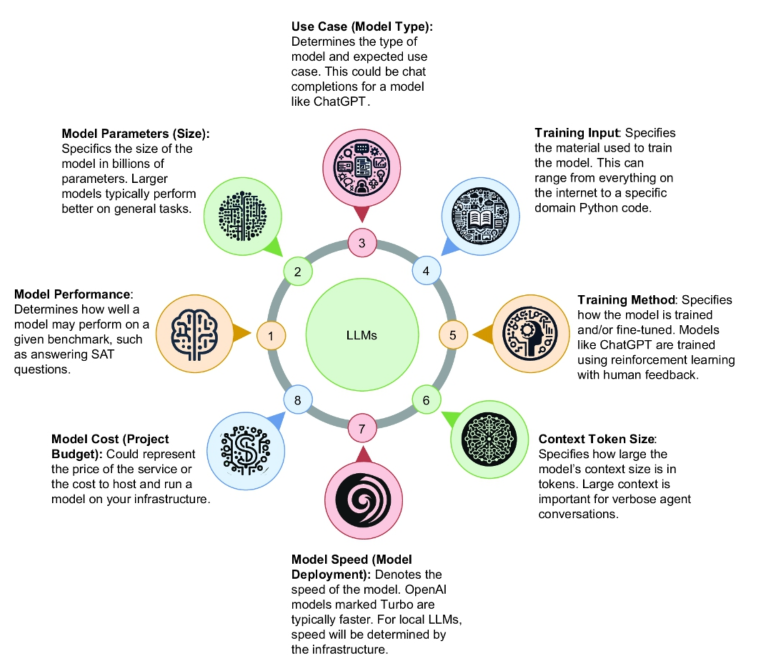
